In [1]:
import torchvision
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.utils.data as Data
from torchvision import transforms
from torchvision.datasets import ImageFolder

In [2]:
def fisherscore(data, labels, num):

    high = len(data)  # 向量个数
    weight = len(data[0])  # 向量长度
    P_num = np.sum(labels == 0)  # 正样本
    N_num = np.sum(labels == 1)  # 负样本

    # 计算Fisher score

    fisherscore = []
    for i in range(weight):
        p = []
        n = []
        p_var = []
        n_var = []
        for j in range(high):
            if labels[j] == 0:
                p.append(data[j, i])
            if labels[j] == 1:
                n.append(data[j, i])

        p_average = np.sum(p) / len(p)
        n_average = np.sum(n) / len(n)
        average = (np.sum(p) + np.sum(n)) / (len(p) + len(n))

        for j in range(high):
            if labels[j] == 0:
                p_var.append((data[j, i] - p_average) ** 2)
            if labels[j] == 1:
                n_var.append((data[j, i] - n_average) ** 2)

        score = ((p_average - average) ** 2 + (n_average - average) ** 2) / (
                    np.sum(p_var) / len(p) + np.sum(n_var) / len(n))

        fisherscore.append(score)

    index = np.argsort(-np.array(fisherscore))  # 返回索引
    new_data = []
    for i in range(num):
        new_data.append(data[:, index[i]])

    new_data = np.array(new_data)
    new_data = new_data.transpose(1, 0)

    return new_data

In [3]:
import torchvision
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.utils.data as Data
from torchvision import transforms
from torchvision.datasets import ImageFolder
from nilearn.connectome import ConnectivityMeasure
from nilearn.connectome import sym_matrix_to_vec


'''
加载提取出来的特征数据集
'''

'''
加载caltech数据
'''
caltech_train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\caltech\\caltech_train_features.npy')
caltech_train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\caltech\\caltech_train_labels.npy')
caltech_train_features = np.squeeze(caltech_train_features)
#print("caltech_train_features.shape:", caltech_train_features.shape)
#print("caltech_train_labels.shape", caltech_train_labels.shape)

caltech_test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\caltech\\caltech_test_features.npy')
caltech_test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\caltech\\caltech_test_labels.npy')
caltech_test_features = np.squeeze(caltech_test_features)
#print("caltech_test_features.shape:", caltech_test_features.shape)
#print("caltech_test_labels.shape", caltech_test_labels.shape)


#caltech构建皮尔逊矩阵
caltech_addfeatures_train = []
caltech_addfeatures_test = []

for i in range(30):
    min_train = caltech_train_features[i * 146:(i + 1) * 146]
    caltech_addfeatures_train.append(min_train)

for i in range(7):
    min_test = caltech_test_features[i * 146:(i + 1) * 146]
    caltech_addfeatures_test.append(min_test)

caltech_addfeatures_train = np.squeeze(np.array(caltech_addfeatures_train))
caltech_addfeatures_train = caltech_addfeatures_train.transpose(0,2,1)
caltech_addfeatures_test = np.squeeze(np.array(caltech_addfeatures_test))
caltech_addfeatures_test = caltech_addfeatures_test.transpose(0,2,1)

caltech_addtrain_labels = np.array([0] * 15 + [1] * 15)
caltech_addtest_labels = np.array([0] * 4 + [1] * 3)


conn_est = ConnectivityMeasure(kind='partial correlation')
caltech_addfeatures_train = conn_est.fit_transform(caltech_addfeatures_train)
caltech_addfeatures_train = sym_matrix_to_vec(caltech_addfeatures_train)
caltech_addfeatures_train = fisherscore(caltech_addfeatures_train, caltech_addtrain_labels, 2000)
print('caltech:',caltech_addfeatures_train.shape)

caltech_addfeatures_test = conn_est.fit_transform(caltech_addfeatures_test)
caltech_addfeatures_test = sym_matrix_to_vec(caltech_addfeatures_test)
caltech_addfeatures_test = fisherscore(caltech_addfeatures_test, caltech_addtest_labels, 2000)
print('caltech:',caltech_addfeatures_test.shape)

'''
加载leuven数据
'''
leuven_train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\leuven\\leuven_train_features.npy')
leuven_train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\leuven\\leuven_train_labels.npy')
leuven_train_features = np.squeeze(leuven_train_features)
#print("leuven_train_features.shape:", leuven_train_features.shape)
#print("leuven_train_labels.shape", leuven_train_labels.shape)

leuven_test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\leuven\\leuven_test_features.npy')
leuven_test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\leuven\\leuven_test_labels.npy')
leuven_test_features = np.squeeze(leuven_test_features)
#print("leuven_test_features.shape:", leuven_test_features.shape)
#print("leuven_test_labels.shape", leuven_test_labels.shape)

#leuven构建皮尔逊矩阵
leuven_addfeatures_train = []
leuven_addfeatures_test = []

for i in range(52):
    min_train = leuven_train_features[i * 246:(i + 1) * 246]
    leuven_addfeatures_train.append(min_train)

for i in range(11):
    min_test = leuven_test_features[i * 246:(i + 1) * 246]
    leuven_addfeatures_test.append(min_test)

leuven_addfeatures_train = np.squeeze(np.array(leuven_addfeatures_train))
leuven_addfeatures_train = leuven_addfeatures_train.transpose(0,2,1)
leuven_addfeatures_test = np.squeeze(np.array(leuven_addfeatures_test))
leuven_addfeatures_test = leuven_addfeatures_test.transpose(0,2,1)
leuven_addtrain_labels = np.array([0] * 24 + [1] * 28)
leuven_addtest_labels = np.array([0] * 5 + [1] * 6)


#conn_est = ConnectivityMeasure(kind='tangent')
leuven_addfeatures_train = conn_est.fit_transform(leuven_addfeatures_train)
leuven_addfeatures_train = sym_matrix_to_vec(leuven_addfeatures_train)
leuven_addfeatures_train = fisherscore(leuven_addfeatures_train, leuven_addtrain_labels, 2000)
print('leuven:',leuven_addfeatures_train.shape)

leuven_addfeatures_test = conn_est.fit_transform(leuven_addfeatures_test)
leuven_addfeatures_test = sym_matrix_to_vec(leuven_addfeatures_test)
leuven_addfeatures_test = fisherscore(leuven_addfeatures_test, leuven_addtest_labels, 2000)
print('leuven:',leuven_addfeatures_test.shape)

'''
加载nyu数据
'''
nyu_train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\nyu\\nyu_train_features.npy')
nyu_train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\nyu\\nyu_train_labels.npy')
nyu_train_features = np.squeeze(nyu_train_features)
# print("ohsu_train_features.shape:", nyu_train_features.shape)
# print("ohsu_train_labels.shape", nyu_train_labels.shape)

nyu_test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\nyu\\nyu_test_features.npy')
nyu_test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\nyu\\nyu_test_labels.npy')
nyu_test_features = np.squeeze(nyu_test_features)
# print("ohsu_test_features.shape:", nyu_test_features.shape)
# print("ohsu_test_labels.shape", nyu_test_labels.shape)

#nyu构建皮尔逊矩阵
nyu_addfeatures_train = []
nyu_addfeatures_test = []

for i in range(139):
    min_train = nyu_train_features[i * 176:(i + 1) * 176]
    nyu_addfeatures_train.append(min_train)

for i in range(35):
    min_test = nyu_test_features[i * 176:(i + 1) * 176]
    nyu_addfeatures_test.append(min_test)

nyu_addfeatures_train = np.squeeze(np.array(nyu_addfeatures_train))
nyu_addfeatures_train = nyu_addfeatures_train.transpose(0,2,1)
nyu_addfeatures_test = np.squeeze(np.array(nyu_addfeatures_test))
nyu_addfeatures_test = nyu_addfeatures_test.transpose(0,2,1)
nyu_addtrain_labels = np.array([0] * 60 + [1] * 79)
nyu_addtest_labels = np.array([0] * 15 + [1] * 20)


#conn_est = ConnectivityMeasure(kind='tangent')
nyu_addfeatures_train = conn_est.fit_transform(nyu_addfeatures_train)
nyu_addfeatures_train = sym_matrix_to_vec(nyu_addfeatures_train)
nyu_addfeatures_train = fisherscore(nyu_addfeatures_train, nyu_addtrain_labels, 2000)
print('nyu:',nyu_addfeatures_train.shape)

nyu_addfeatures_test = conn_est.fit_transform(nyu_addfeatures_test)
nyu_addfeatures_test = sym_matrix_to_vec(nyu_addfeatures_test)
nyu_addfeatures_test = fisherscore(nyu_addfeatures_test, nyu_addtest_labels, 2000)
print('nyu:',nyu_addfeatures_test.shape)

'''
加载ohsu数据
'''
ohsu_train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\ohsu\\ohsu_train_features.npy')
ohsu_train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\ohsu\\ohsu_train_labels.npy')
ohsu_train_features = np.squeeze(ohsu_train_features)
# print("ohsu_train_features.shape:", ohsu_train_features.shape)
# print("ohsu_train_labels.shape", ohsu_train_labels.shape)

ohsu_test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\ohsu\\ohsu_test_features.npy')
ohsu_test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\ohsu\\ohsu_test_labels.npy')
ohsu_test_features = np.squeeze(ohsu_test_features)
# print("ohsu_test_features.shape:", ohsu_test_features.shape)
# print("ohsu_test_labels.shape", ohsu_test_labels.shape)

#ohsu构建皮尔逊矩阵
ohsu_addfeatures_train = []
ohsu_addfeatures_test = []

for i in range(22):
    min_train = ohsu_train_features[i * 78:(i + 1) * 78]
    ohsu_addfeatures_train.append(min_train)

for i in range(4):
    min_test = ohsu_test_features[i * 78:(i + 1) * 78]
    ohsu_addfeatures_test.append(min_test)

ohsu_addfeatures_train = np.squeeze(np.array(ohsu_addfeatures_train))
ohsu_addfeatures_train = ohsu_addfeatures_train.transpose(0,2,1)
ohsu_addfeatures_test = np.squeeze(np.array(ohsu_addfeatures_test))
ohsu_addfeatures_test = ohsu_addfeatures_test.transpose(0,2,1)
ohsu_addtrain_labels = np.array([0] * 10 + [1] * 12)
ohsu_addtest_labels = np.array([0] * 2 + [1] * 2)


#conn_est = ConnectivityMeasure(kind='tangent')
ohsu_addfeatures_train = conn_est.fit_transform(ohsu_addfeatures_train)
ohsu_addfeatures_train = sym_matrix_to_vec(ohsu_addfeatures_train)
ohsu_addfeatures_train = fisherscore(ohsu_addfeatures_train, ohsu_addtrain_labels, 2000)
print('ohsu:',ohsu_addfeatures_train.shape)

ohsu_addfeatures_test = conn_est.fit_transform(ohsu_addfeatures_test)
ohsu_addfeatures_test = sym_matrix_to_vec(ohsu_addfeatures_test)
ohsu_addfeatures_test = fisherscore(ohsu_addfeatures_test, ohsu_addtest_labels, 2000)
print('ohsu:',ohsu_addfeatures_test.shape)

'''
加载olin数据
'''
olin_train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\olin\\olin_train_features.npy')
olin_train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\olin\\olin_train_labels.npy')
olin_train_features = np.squeeze(olin_train_features)
# print("olin_train_features.shape:", olin_train_features.shape)
# print("olin_train_labels.shape", olin_train_labels.shape)

olin_test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\olin\\olin_test_features.npy')
olin_test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\olin\\olin_test_labels.npy')
olin_test_features = np.squeeze(olin_test_features)
# print("olin_test_features.shape:", olin_test_features.shape)
# print("olin_test_labels.shape", olin_test_labels.shape)


#olin构建皮尔逊矩阵
olin_addfeatures_train = []
olin_addfeatures_test = []

for i in range(28):
    min_train = olin_train_features[i * 206:(i + 1) * 206]
    olin_addfeatures_train.append(min_train)

for i in range(6):
    min_test = olin_test_features[i * 206:(i + 1) * 206]
    olin_addfeatures_test.append(min_test)

olin_addfeatures_train = np.squeeze(np.array(olin_addfeatures_train))
olin_addfeatures_train = olin_addfeatures_train.transpose(0,2,1)
olin_addfeatures_test = np.squeeze(np.array(olin_addfeatures_test))
olin_addfeatures_test = olin_addfeatures_test.transpose(0,2,1)
olin_addtrain_labels = np.array([0] * 16 + [1] * 12)
olin_addtest_labels = np.array([0] * 3 + [1] * 3)


#conn_est = ConnectivityMeasure(kind='tangent')
olin_addfeatures_train = conn_est.fit_transform(olin_addfeatures_train)
olin_addfeatures_train = sym_matrix_to_vec(olin_addfeatures_train)
olin_addfeatures_train = fisherscore(olin_addfeatures_train, olin_addtrain_labels, 2000)
print('olin:',olin_addfeatures_train.shape)

olin_addfeatures_test = conn_est.fit_transform(olin_addfeatures_test)
olin_addfeatures_test = sym_matrix_to_vec(olin_addfeatures_test)
olin_addfeatures_test = fisherscore(olin_addfeatures_test, olin_addtest_labels, 2000)
print('olin:',olin_addfeatures_test.shape)

'''
加载pitt数据
'''
pitt_train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\pitt\\pitt_train_features.npy')
pitt_train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\pitt\\pitt_train_labels.npy')
pitt_train_features = np.squeeze(pitt_train_features)
# print("pitt_train_features.shape:", pitt_train_features.shape)
# print("pitt_train_labels.shape", pitt_train_labels.shape)

pitt_test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\pitt\\pitt_test_features.npy')
pitt_test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\pitt\\pitt_test_labels.npy')
pitt_test_features = np.squeeze(pitt_test_features)
# print("pitt_test_features.shape:", pitt_test_features.shape)
# print("pitt_test_labels.shape", pitt_test_labels.shape)

#pitt构建皮尔逊矩阵
pitt_addfeatures_train = []
pitt_addfeatures_test = []

for i in range(46):
    min_train = pitt_train_features[i * 196:(i + 1) * 196]
    pitt_addfeatures_train.append(min_train)

for i in range(10):
    min_test = pitt_test_features[i * 196:(i + 1) * 196]
    pitt_addfeatures_test.append(min_test)

pitt_addfeatures_train = np.squeeze(np.array(pitt_addfeatures_train))
pitt_addfeatures_train = pitt_addfeatures_train.transpose(0,2,1)
pitt_addfeatures_test = np.squeeze(np.array(pitt_addfeatures_test))
pitt_addfeatures_test = pitt_addfeatures_test.transpose(0,2,1)
pitt_addtrain_labels = np.array([0] * 24 + [1] * 22)
pitt_addtest_labels = np.array([0] * 5 + [1] * 5)


#conn_est = ConnectivityMeasure(kind='tangent')
pitt_addfeatures_train = conn_est.fit_transform(pitt_addfeatures_train)
pitt_addfeatures_train = sym_matrix_to_vec(pitt_addfeatures_train)
pitt_addfeatures_train = fisherscore(pitt_addfeatures_train, pitt_addtrain_labels, 2000)
print('pitt:',pitt_addfeatures_train.shape)

pitt_addfeatures_test = conn_est.fit_transform(pitt_addfeatures_test)
pitt_addfeatures_test = sym_matrix_to_vec(pitt_addfeatures_test)
pitt_addfeatures_test = fisherscore(pitt_addfeatures_test, pitt_addtest_labels, 2000)
print('pitt:',pitt_addfeatures_test.shape)


'''
加载sbl数据
'''
sbl_train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\sbl\\sbl_train_features.npy')
sbl_train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\sbl\\sbl_train_labels.npy')
sbl_train_features = np.squeeze(sbl_train_features)
# print("sbl_train_features.shape:", sbl_train_features.shape)
# print("sbl_train_labels.shape", sbl_train_labels.shape)

sbl_test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\sbl\\sbl_test_features.npy')
sbl_test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\sbl\\sbl_test_labels.npy')
sbl_test_features = np.squeeze(sbl_test_features)
# print("sbl_test_features.shape:", sbl_test_features.shape)
# print("sbl_test_labels.shape", sbl_test_labels.shape)

#sbl构建皮尔逊矩阵
sbl_addfeatures_train = []
sbl_addfeatures_test = []

for i in range(24):
    min_train = sbl_train_features[i * 196:(i + 1) * 196]
    sbl_addfeatures_train.append(min_train)

for i in range(5):
    min_test = sbl_test_features[i * 196:(i + 1) * 196]
    sbl_addfeatures_test.append(min_test)

sbl_addfeatures_train = np.squeeze(np.array(sbl_addfeatures_train))
sbl_addfeatures_train = sbl_addfeatures_train.transpose(0,2,1)
sbl_addfeatures_test = np.squeeze(np.array(sbl_addfeatures_test))
sbl_addfeatures_test = sbl_addfeatures_test.transpose(0,2,1)
sbl_addtrain_labels = np.array([0] * 12 + [1] * 12)
sbl_addtest_labels = np.array([0] * 2 + [1] * 3)


#conn_est = ConnectivityMeasure(kind='tangent')
sbl_addfeatures_train = conn_est.fit_transform(sbl_addfeatures_train)
sbl_addfeatures_train = sym_matrix_to_vec(sbl_addfeatures_train)
sbl_addfeatures_train = fisherscore(sbl_addfeatures_train, sbl_addtrain_labels, 2000)
print('sbl:',sbl_addfeatures_train.shape)

sbl_addfeatures_test = conn_est.fit_transform(sbl_addfeatures_test)
sbl_addfeatures_test = sym_matrix_to_vec(sbl_addfeatures_test)
sbl_addfeatures_test = fisherscore(sbl_addfeatures_test, sbl_addtest_labels, 2000)
print('sbl:',sbl_addfeatures_test.shape)

'''
加载sdsu数据
'''
sdsu_train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\sdsu\\sdsu_train_features.npy')
sdsu_train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\sdsu\\sdsu_train_labels.npy')
sdsu_train_features = np.squeeze(sdsu_train_features)
# print("sdsu_train_features.shape:", sdsu_train_features.shape)
# print("sdsu_train_labels.shape", sdsu_train_labels.shape)

sdsu_test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\sdsu\\sdsu_test_features.npy')
sdsu_test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\sdsu\\sdsu_test_labels.npy')
sdsu_test_features = np.squeeze(sdsu_test_features)
# print("sdsu_test_features.shape:", sdsu_test_features.shape)
# print("sdsu_test_labels.shape", sdsu_test_labels.shape)

#sdsu构建皮尔逊矩阵
sdsu_addfeatures_train = []
sdsu_addfeatures_test = []

for i in range(30):
    min_train = sdsu_train_features[i * 176:(i + 1) * 176]
    sdsu_addfeatures_train.append(min_train)

for i in range(6):
    min_test = sdsu_test_features[i * 176:(i + 1) * 176]
    sdsu_addfeatures_test.append(min_test)

sdsu_addfeatures_train = np.squeeze(np.array(sdsu_addfeatures_train))
sdsu_addfeatures_train = sdsu_addfeatures_train.transpose(0,2,1)
sdsu_addfeatures_test = np.squeeze(np.array(sdsu_addfeatures_test))
sdsu_addfeatures_test = sdsu_addfeatures_test.transpose(0,2,1)
sdsu_addtrain_labels = np.array([0] * 12 + [1] * 18)
sdsu_addtest_labels = np.array([0] * 2 + [1] * 4)


#conn_est = ConnectivityMeasure(kind='tangent')
sdsu_addfeatures_train = conn_est.fit_transform(sdsu_addfeatures_train)
sdsu_addfeatures_train = sym_matrix_to_vec(sdsu_addfeatures_train)
sdsu_addfeatures_train = fisherscore(sdsu_addfeatures_train, sdsu_addtrain_labels, 2000)
print('sdsu:',sdsu_addfeatures_train.shape)

sdsu_addfeatures_test = conn_est.fit_transform(sdsu_addfeatures_test)
sdsu_addfeatures_test = sym_matrix_to_vec(sdsu_addfeatures_test)
sdsu_addfeatures_test = fisherscore(sdsu_addfeatures_test, sdsu_addtest_labels, 2000)
print('sdsu:',sdsu_addfeatures_test.shape)

'''
加载um数据
'''
um_train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\um\\um_train_features.npy')
um_train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\um\\um_train_labels.npy')
um_train_features = np.squeeze(um_train_features)
# print("um_train_features.shape:", um_train_features.shape)
# print("um_train_labels.shape", um_train_labels.shape)

um_test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\um\\um_test_features.npy')
um_test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\um\\um_test_labels.npy')
um_test_features = np.squeeze(um_test_features)
# print("um_test_features.shape:", um_test_features.shape)
# print("um_test_labels.shape", um_test_labels.shape)

#um构建皮尔逊矩阵
um_addfeatures_train = []
um_addfeatures_test = []

for i in range(86):
    min_train = um_train_features[i * 296:(i + 1) * 296]
    um_addfeatures_train.append(min_train)

for i in range(20):
    min_test = um_test_features[i * 296:(i + 1) * 296]
    um_addfeatures_test.append(min_test)

um_addfeatures_train = np.squeeze(np.array(um_addfeatures_train))
um_addfeatures_train = um_addfeatures_train.transpose(0,2,1)
um_addfeatures_test = np.squeeze(np.array(um_addfeatures_test))
um_addfeatures_test = um_addfeatures_test.transpose(0,2,1)
um_addtrain_labels = np.array([0] * 43 + [1] * 43)
um_addtest_labels = np.array([0] * 10 + [1] * 10)


#conn_est = ConnectivityMeasure(kind='tangent')
um_addfeatures_train = conn_est.fit_transform(um_addfeatures_train)
um_addfeatures_train = sym_matrix_to_vec(um_addfeatures_train)
um_addfeatures_train = fisherscore(um_addfeatures_train, um_addtrain_labels, 2000)
print('um:',um_addfeatures_train.shape)

um_addfeatures_test = conn_est.fit_transform(um_addfeatures_test)
um_addfeatures_test = sym_matrix_to_vec(um_addfeatures_test)
um_addfeatures_test = fisherscore(um_addfeatures_test, um_addtest_labels, 2000)
print('um:',um_addfeatures_test.shape)

'''
加载usm数据
'''
usm_train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\usm\\usm_train_features.npy')
usm_train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\usm\\usm_train_labels.npy')
usm_train_features = np.squeeze(usm_train_features)
# print("usm_train_features.shape:", usm_train_features.shape)
# print("usm_train_labels.shape", usm_train_labels.shape)

usm_test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\usm\\usm_test_features.npy')
usm_test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\usm\\usm_test_labels.npy')
usm_test_features = np.squeeze(usm_test_features)
# print("usm_test_features.shape:", usm_test_features.shape)
# print("usm_test_labels.shape", usm_test_labels.shape)

#usm构建皮尔逊矩阵
usm_addfeatures_train = []
usm_addfeatures_test = []

for i in range(57):
    min_train = usm_train_features[i * 236:(i + 1) * 236]
    usm_addfeatures_train.append(min_train)

for i in range(14):
    min_test = usm_test_features[i * 236:(i + 1) * 236]
    usm_addfeatures_test.append(min_test)

usm_addfeatures_train = np.squeeze(np.array(usm_addfeatures_train))
usm_addfeatures_train = usm_addfeatures_train.transpose(0,2,1)
usm_addfeatures_test = np.squeeze(np.array(usm_addfeatures_test))
usm_addfeatures_test = usm_addfeatures_test.transpose(0,2,1)
usm_addtrain_labels = np.array([0] * 37 + [1] * 20)
usm_addtest_labels = np.array([0] * 9 + [1] * 5)


#conn_est = ConnectivityMeasure(kind='tangent')
usm_addfeatures_train = conn_est.fit_transform(usm_addfeatures_train)
usm_addfeatures_train = sym_matrix_to_vec(usm_addfeatures_train)
usm_addfeatures_train = fisherscore(usm_addfeatures_train, usm_addtrain_labels, 2000)
print('usm:',usm_addfeatures_train.shape)

usm_addfeatures_test = conn_est.fit_transform(usm_addfeatures_test)
usm_addfeatures_test = sym_matrix_to_vec(usm_addfeatures_test)
usm_addfeatures_test = fisherscore(usm_addfeatures_test, usm_addtest_labels, 2000)
print('usm:',usm_addfeatures_test.shape)






'''
构建多站点数据集
'''

train_data = np.vstack((caltech_addfeatures_train,
                        leuven_addfeatures_train,
                        nyu_addfeatures_train,
                        ohsu_addfeatures_train,
                        olin_addfeatures_train,
                        pitt_addfeatures_train,
                        sbl_addfeatures_train,
                        sdsu_addfeatures_train,
                        um_addfeatures_train,
                        usm_addfeatures_train,
                        ))
train_label = np.hstack((caltech_addtrain_labels,
                         leuven_addtrain_labels,
                         nyu_addtrain_labels,
                         ohsu_addtrain_labels,
                         olin_addtrain_labels,
                         pitt_addtrain_labels,
                         sbl_addtrain_labels,
                         sdsu_addtrain_labels,
                         um_addtrain_labels,
                         usm_addtrain_labels,
                         ))

test_data = np.vstack((caltech_addfeatures_test,
                       leuven_addfeatures_test,
                       nyu_addfeatures_test,
                       ohsu_addfeatures_test,
                       olin_addfeatures_test,
                       pitt_addfeatures_test,
                       sbl_addfeatures_test,
                       sdsu_addfeatures_test,
                       um_addfeatures_test,
                       usm_addfeatures_test,
                       ))
test_label = np.hstack((caltech_addtest_labels,
                        leuven_addtest_labels,
                        nyu_addtest_labels,
                        ohsu_addtest_labels,
                        olin_addtest_labels,
                        pitt_addtest_labels,
                        sbl_addtest_labels,
                        sdsu_addtest_labels,
                        um_addtest_labels,
                        usm_addtest_labels,
                        ))





print("train_data:", train_data.shape)
print("train_label:", train_label.shape)
print("test_data:", test_data.shape)
print("test_label:", test_label.shape)



data = np.vstack((train_data, test_data))
label = np.hstack((train_label,test_label))
print('data', data.shape)
print('label', label.shape)


caltech: (30, 2000)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars


caltech: (7, 2000)
leuven: (52, 2000)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


leuven: (11, 2000)
nyu: (139, 2000)
nyu: (35, 2000)
ohsu: (22, 2000)
ohsu: (4, 2000)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


olin: (28, 2000)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


olin: (6, 2000)
pitt: (46, 2000)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


pitt: (10, 2000)
sbl: (24, 2000)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


sbl: (5, 2000)
sdsu: (30, 2000)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


sdsu: (6, 2000)
um: (86, 2000)
um: (20, 2000)
usm: (57, 2000)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars


usm: (14, 2000)
train_data: (514, 2000)
train_label: (514,)
test_data: (118, 2000)
test_label: (118,)
data (632, 2000)
label (632,)


In [4]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from keras.optimizers import SGD
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Activation, MaxPooling1D

#x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2)

model = Sequential()
model.add(Dense(1024, activation='relu', input_dim=2000))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

sgd = SGD()
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

his = model.fit(x=train_data, y=train_label, batch_size=48, epochs=1000,shuffle=True, verbose=1, 
               validation_data=(test_data,test_label))

Using TensorFlow backend.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "D:\anaconda\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "D:\anaconda\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "D:\anaconda\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "D:\anaconda\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: 动态链接库(DLL)初始化例程失败。

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "D:\anaconda\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "D:\anaconda\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "D:\anaconda\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "D:\anaconda\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: 动态链接库(DLL)初始化例程失败。

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3

TypeError: can only concatenate str (not "list") to str

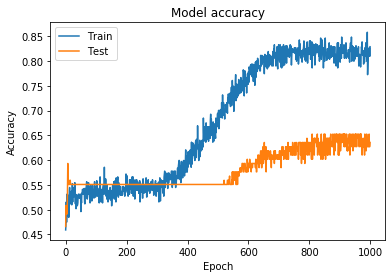

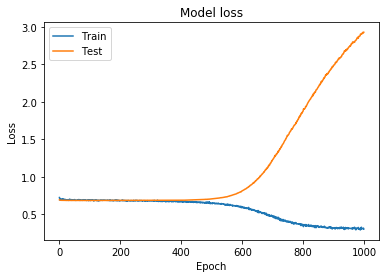

In [68]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [54]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import learning_curve
# from sklearn.model_selection import train_test_split

# mlps = []
# mlp = MLPClassifier(hidden_layer_sizes=(1000,200), max_iter=2000, alpha=1e-4,
#                     solver='sgd', verbose=100,
#                     learning_rate_init=0.01, n_iter_no_change=1000)
# #x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2)
# mlp.fit(x_train, y_train)
# mlp.score(x_test, y_test)
# #train_sizes, train_scores, valid_scores = learning_curve(mlp, data, label, train_sizes=np.linspace(0.1, 1.0, 1), cv=2) 


Iteration 1, loss = 0.69574095
Iteration 2, loss = 0.69425916
Iteration 3, loss = 0.69363412
Iteration 4, loss = 0.69153250
Iteration 5, loss = 0.69011119
Iteration 6, loss = 0.68832007
Iteration 7, loss = 0.68819703
Iteration 8, loss = 0.68611179
Iteration 9, loss = 0.68626928
Iteration 10, loss = 0.68490772
Iteration 11, loss = 0.68470455
Iteration 12, loss = 0.68427359
Iteration 13, loss = 0.68398524
Iteration 14, loss = 0.68273149
Iteration 15, loss = 0.68229449
Iteration 16, loss = 0.68341625
Iteration 17, loss = 0.68187523
Iteration 18, loss = 0.68297108
Iteration 19, loss = 0.68336388
Iteration 20, loss = 0.68212396
Iteration 21, loss = 0.68057425
Iteration 22, loss = 0.68388512
Iteration 23, loss = 0.68227366
Iteration 24, loss = 0.68106120
Iteration 25, loss = 0.68047955
Iteration 26, loss = 0.68119256
Iteration 27, loss = 0.68108408
Iteration 28, loss = 0.68007533
Iteration 29, loss = 0.67976560
Iteration 30, loss = 0.68095474
Iteration 31, loss = 0.67961423
Iteration 32, los

Iteration 254, loss = 0.59365415
Iteration 255, loss = 0.58597712
Iteration 256, loss = 0.58728526
Iteration 257, loss = 0.58321028
Iteration 258, loss = 0.58658345
Iteration 259, loss = 0.59543038
Iteration 260, loss = 0.57766801
Iteration 261, loss = 0.58110174
Iteration 262, loss = 0.57198658
Iteration 263, loss = 0.56904810
Iteration 264, loss = 0.57283524
Iteration 265, loss = 0.57250617
Iteration 266, loss = 0.56903355
Iteration 267, loss = 0.56962065
Iteration 268, loss = 0.56992611
Iteration 269, loss = 0.57016655
Iteration 270, loss = 0.55782236
Iteration 271, loss = 0.55650096
Iteration 272, loss = 0.55841283
Iteration 273, loss = 0.55930665
Iteration 274, loss = 0.58357404
Iteration 275, loss = 0.58848407
Iteration 276, loss = 0.54955736
Iteration 277, loss = 0.56336814
Iteration 278, loss = 0.56989951
Iteration 279, loss = 0.61163661
Iteration 280, loss = 0.54376734
Iteration 281, loss = 0.54785401
Iteration 282, loss = 0.56595107
Iteration 283, loss = 0.53613942
Iteration 

Iteration 503, loss = 0.33062367
Iteration 504, loss = 0.21349045
Iteration 505, loss = 0.23410984
Iteration 506, loss = 0.27812241
Iteration 507, loss = 0.20883769
Iteration 508, loss = 0.24468122
Iteration 509, loss = 0.21720079
Iteration 510, loss = 0.23540946
Iteration 511, loss = 0.33094279
Iteration 512, loss = 0.21391450
Iteration 513, loss = 0.20436208
Iteration 514, loss = 0.20438716
Iteration 515, loss = 0.30765281
Iteration 516, loss = 0.29258277
Iteration 517, loss = 0.31656717
Iteration 518, loss = 0.20838064
Iteration 519, loss = 0.22553764
Iteration 520, loss = 0.28923613
Iteration 521, loss = 0.19958387
Iteration 522, loss = 0.19584279
Iteration 523, loss = 0.20109872
Iteration 524, loss = 0.22556482
Iteration 525, loss = 0.27589150
Iteration 526, loss = 0.61385750
Iteration 527, loss = 0.22945554
Iteration 528, loss = 0.21343286
Iteration 529, loss = 0.21545690
Iteration 530, loss = 0.21308302
Iteration 531, loss = 0.26199017
Iteration 532, loss = 0.21960397
Iteration 

Iteration 753, loss = 0.19510544
Iteration 754, loss = 0.37542684
Iteration 755, loss = 0.21047030
Iteration 756, loss = 0.14662522
Iteration 757, loss = 0.14656899
Iteration 758, loss = 0.16650228
Iteration 759, loss = 0.21167485
Iteration 760, loss = 0.14666690
Iteration 761, loss = 0.15390444
Iteration 762, loss = 0.23276051
Iteration 763, loss = 0.23830372
Iteration 764, loss = 0.14146824
Iteration 765, loss = 0.14588290
Iteration 766, loss = 0.14220663
Iteration 767, loss = 0.20454611
Iteration 768, loss = 0.14206165
Iteration 769, loss = 0.59227941
Iteration 770, loss = 0.16893259
Iteration 771, loss = 0.15517981
Iteration 772, loss = 0.20611574
Iteration 773, loss = 0.19612534
Iteration 774, loss = 0.22973788
Iteration 775, loss = 0.14678904
Iteration 776, loss = 0.20178118
Iteration 777, loss = 0.14188318
Iteration 778, loss = 0.21700971
Iteration 779, loss = 0.14772917
Iteration 780, loss = 0.14646551
Iteration 781, loss = 0.15615667
Iteration 782, loss = 0.20256350
Iteration 

Iteration 1241, loss = 0.15727681
Iteration 1242, loss = 0.20152318
Iteration 1243, loss = 0.15547809
Iteration 1244, loss = 0.19975605
Iteration 1245, loss = 0.10512817
Iteration 1246, loss = 0.12473939
Iteration 1247, loss = 0.11845090
Iteration 1248, loss = 0.12660905
Iteration 1249, loss = 0.10323296
Iteration 1250, loss = 0.09432985
Iteration 1251, loss = 0.10668888
Iteration 1252, loss = 0.23104314
Iteration 1253, loss = 0.27228600
Iteration 1254, loss = 0.26623130
Iteration 1255, loss = 0.09168618
Iteration 1256, loss = 0.08927400
Iteration 1257, loss = 0.10346493
Iteration 1258, loss = 0.10622320
Iteration 1259, loss = 0.10248035
Iteration 1260, loss = 0.08630782
Iteration 1261, loss = 0.12287358
Iteration 1262, loss = 0.09424076
Iteration 1263, loss = 0.16814490
Iteration 1264, loss = 0.31207779
Iteration 1265, loss = 0.08476171
Iteration 1266, loss = 0.13614617
Iteration 1267, loss = 0.30792838
Iteration 1268, loss = 0.19460713
Iteration 1269, loss = 0.11459096
Iteration 1270

Iteration 1483, loss = 0.12083452
Iteration 1484, loss = 0.22168377
Iteration 1485, loss = 0.09551492
Iteration 1486, loss = 0.09440830
Iteration 1487, loss = 0.08853532
Iteration 1488, loss = 0.18083912
Iteration 1489, loss = 0.11024673
Iteration 1490, loss = 0.09177682
Iteration 1491, loss = 0.12691861
Iteration 1492, loss = 0.15792029
Iteration 1493, loss = 0.42687860
Iteration 1494, loss = 0.27262049
Iteration 1495, loss = 0.20523517
Iteration 1496, loss = 0.11368389
Iteration 1497, loss = 0.10936975
Iteration 1498, loss = 0.11952225
Iteration 1499, loss = 0.23821208
Iteration 1500, loss = 0.11901993
Iteration 1501, loss = 0.09332103
Iteration 1502, loss = 0.15663861
Iteration 1503, loss = 0.23989579
Iteration 1504, loss = 0.09864515
Iteration 1505, loss = 0.10179921
Iteration 1506, loss = 0.24288784
Iteration 1507, loss = 0.31611375
Iteration 1508, loss = 0.10388375
Iteration 1509, loss = 0.09842767
Iteration 1510, loss = 0.20869892
Iteration 1511, loss = 0.31659761
Iteration 1512

Iteration 1963, loss = 0.12536405
Iteration 1964, loss = 0.19586497
Iteration 1965, loss = 0.34438982
Iteration 1966, loss = 0.20883058
Iteration 1967, loss = 0.14034071
Iteration 1968, loss = 0.13961161
Iteration 1969, loss = 0.13023046
Iteration 1970, loss = 0.13030948
Iteration 1971, loss = 0.16910676
Iteration 1972, loss = 0.16186554
Iteration 1973, loss = 0.22001344
Iteration 1974, loss = 0.23523209
Iteration 1975, loss = 0.11449831
Iteration 1976, loss = 0.12386678
Iteration 1977, loss = 0.14180781
Iteration 1978, loss = 0.12850783
Iteration 1979, loss = 0.11604460
Iteration 1980, loss = 0.11183936
Iteration 1981, loss = 0.13053369
Iteration 1982, loss = 0.10312403
Iteration 1983, loss = 0.13821784
Iteration 1984, loss = 0.13012794
Iteration 1985, loss = 0.16099847
Iteration 1986, loss = 0.25458369
Iteration 1987, loss = 0.31852987
Iteration 1988, loss = 0.26547061
Iteration 1989, loss = 0.13886900
Iteration 1990, loss = 0.19362197
Iteration 1991, loss = 0.25654269
Iteration 1992

D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9478260869565217

0.8983050847457628

In [39]:
train_scores.shape

(1, 2)

In [40]:
valid_scores

array([[0.52531646, 0.51582278]])

In [41]:
train_scores

array([[1., 1.]])

In [144]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from keras.optimizers import SGD
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Activation, MaxPooling1D

x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2)

model = Sequential()
model.add(Dense(1024, activation='relu', input_dim=2000))
#model.add(Dropout(0.5))
#model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
#model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

sgd = SGD()
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

his = model.fit(x=x_train, y=y_train, batch_size=64, epochs=2000,shuffle=True, verbose=1, 
               validation_data=(x_test,y_test))

Train on 505 samples, validate on 127 samples
Epoch 1/2000
505/505 [==============================] - 1s 1ms/step - loss: 0.6981 - accuracy: 0.4653 - val_loss: 0.7009 - val_accuracy: 0.4646
Epoch 2/2000
505/505 [==============================] - 0s 234us/step - loss: 0.6932 - accuracy: 0.5168 - val_loss: 0.7048 - val_accuracy: 0.4173
Epoch 3/2000
505/505 [==============================] - 0s 213us/step - loss: 0.6889 - accuracy: 0.5149 - val_loss: 0.7057 - val_accuracy: 0.4646
Epoch 4/2000
505/505 [==============================] - 0s 209us/step - loss: 0.6913 - accuracy: 0.5030 - val_loss: 0.7069 - val_accuracy: 0.4724
Epoch 5/2000
505/505 [==============================] - 0s 209us/step - loss: 0.6887 - accuracy: 0.5149 - val_loss: 0.7084 - val_accuracy: 0.4646
Epoch 6/2000
505/505 [==============================] - 0s 209us/step - loss: 0.6856 - accuracy: 0.5604 - val_loss: 0.7101 - val_accuracy: 0.4488
Epoch 7/2000
505/505 [==============================] - 0s 211us/step - loss: 0.

Epoch 112/2000
505/505 [==============================] - 0s 211us/step - loss: 0.6789 - accuracy: 0.5545 - val_loss: 0.7250 - val_accuracy: 0.4724
Epoch 113/2000
505/505 [==============================] - 0s 209us/step - loss: 0.6785 - accuracy: 0.5604 - val_loss: 0.7259 - val_accuracy: 0.4724
Epoch 114/2000
505/505 [==============================] - 0s 215us/step - loss: 0.6777 - accuracy: 0.5564 - val_loss: 0.7240 - val_accuracy: 0.4724
Epoch 115/2000
505/505 [==============================] - 0s 215us/step - loss: 0.6743 - accuracy: 0.5762 - val_loss: 0.7250 - val_accuracy: 0.4724
Epoch 116/2000
505/505 [==============================] - 0s 215us/step - loss: 0.6780 - accuracy: 0.5663 - val_loss: 0.7231 - val_accuracy: 0.4724
Epoch 117/2000
505/505 [==============================] - 0s 217us/step - loss: 0.6762 - accuracy: 0.5584 - val_loss: 0.7235 - val_accuracy: 0.4724
Epoch 118/2000
505/505 [==============================] - 0s 213us/step - loss: 0.6748 - accuracy: 0.5564 - val_

505/505 [==============================] - 0s 217us/step - loss: 0.6703 - accuracy: 0.5683 - val_loss: 0.7276 - val_accuracy: 0.4724
Epoch 223/2000
505/505 [==============================] - 0s 209us/step - loss: 0.6686 - accuracy: 0.5743 - val_loss: 0.7303 - val_accuracy: 0.4724
Epoch 224/2000
505/505 [==============================] - 0s 212us/step - loss: 0.6735 - accuracy: 0.5683 - val_loss: 0.7306 - val_accuracy: 0.4724
Epoch 225/2000
505/505 [==============================] - 0s 211us/step - loss: 0.6718 - accuracy: 0.5703 - val_loss: 0.7279 - val_accuracy: 0.4724
Epoch 226/2000
505/505 [==============================] - 0s 209us/step - loss: 0.6751 - accuracy: 0.5505 - val_loss: 0.7295 - val_accuracy: 0.4724
Epoch 227/2000
505/505 [==============================] - 0s 211us/step - loss: 0.6702 - accuracy: 0.5624 - val_loss: 0.7310 - val_accuracy: 0.4724
Epoch 228/2000
505/505 [==============================] - 0s 209us/step - loss: 0.6680 - accuracy: 0.5604 - val_loss: 0.7270 - 

505/505 [==============================] - 0s 213us/step - loss: 0.6706 - accuracy: 0.5683 - val_loss: 0.7297 - val_accuracy: 0.4882
Epoch 333/2000
505/505 [==============================] - 0s 211us/step - loss: 0.6647 - accuracy: 0.5802 - val_loss: 0.7343 - val_accuracy: 0.4882
Epoch 334/2000
505/505 [==============================] - 0s 207us/step - loss: 0.6681 - accuracy: 0.5505 - val_loss: 0.7304 - val_accuracy: 0.4882
Epoch 335/2000
505/505 [==============================] - 0s 209us/step - loss: 0.6697 - accuracy: 0.5644 - val_loss: 0.7302 - val_accuracy: 0.4882
Epoch 336/2000
505/505 [==============================] - 0s 207us/step - loss: 0.6633 - accuracy: 0.5802 - val_loss: 0.7312 - val_accuracy: 0.4882
Epoch 337/2000
505/505 [==============================] - 0s 209us/step - loss: 0.6723 - accuracy: 0.5505 - val_loss: 0.7321 - val_accuracy: 0.4882
Epoch 338/2000
505/505 [==============================] - 0s 217us/step - loss: 0.6665 - accuracy: 0.5723 - val_loss: 0.7335 - 

505/505 [==============================] - 0s 221us/step - loss: 0.6613 - accuracy: 0.5525 - val_loss: 0.7338 - val_accuracy: 0.4882
Epoch 443/2000
505/505 [==============================] - 0s 225us/step - loss: 0.6645 - accuracy: 0.5584 - val_loss: 0.7356 - val_accuracy: 0.4961
Epoch 444/2000
505/505 [==============================] - 0s 221us/step - loss: 0.6610 - accuracy: 0.5861 - val_loss: 0.7308 - val_accuracy: 0.4882
Epoch 445/2000
505/505 [==============================] - 0s 225us/step - loss: 0.6609 - accuracy: 0.5663 - val_loss: 0.7300 - val_accuracy: 0.4882
Epoch 446/2000
505/505 [==============================] - 0s 224us/step - loss: 0.6639 - accuracy: 0.5743 - val_loss: 0.7339 - val_accuracy: 0.4961
Epoch 447/2000
505/505 [==============================] - 0s 223us/step - loss: 0.6628 - accuracy: 0.5683 - val_loss: 0.7344 - val_accuracy: 0.4961
Epoch 448/2000
505/505 [==============================] - 0s 213us/step - loss: 0.6564 - accuracy: 0.5881 - val_loss: 0.7395 - 

505/505 [==============================] - 0s 209us/step - loss: 0.6513 - accuracy: 0.5901 - val_loss: 0.7304 - val_accuracy: 0.4882
Epoch 553/2000
505/505 [==============================] - 0s 207us/step - loss: 0.6578 - accuracy: 0.5703 - val_loss: 0.7299 - val_accuracy: 0.4882
Epoch 554/2000
505/505 [==============================] - 0s 212us/step - loss: 0.6626 - accuracy: 0.5644 - val_loss: 0.7347 - val_accuracy: 0.4961
Epoch 555/2000
505/505 [==============================] - 0s 211us/step - loss: 0.6534 - accuracy: 0.5941 - val_loss: 0.7294 - val_accuracy: 0.4882
Epoch 556/2000
505/505 [==============================] - 0s 213us/step - loss: 0.6567 - accuracy: 0.5644 - val_loss: 0.7283 - val_accuracy: 0.4882
Epoch 557/2000
505/505 [==============================] - 0s 212us/step - loss: 0.6588 - accuracy: 0.5644 - val_loss: 0.7301 - val_accuracy: 0.4882
Epoch 558/2000
505/505 [==============================] - 0s 212us/step - loss: 0.6557 - accuracy: 0.5703 - val_loss: 0.7347 - 

505/505 [==============================] - 0s 211us/step - loss: 0.6484 - accuracy: 0.5960 - val_loss: 0.7234 - val_accuracy: 0.4961
Epoch 663/2000
505/505 [==============================] - 0s 211us/step - loss: 0.6501 - accuracy: 0.5901 - val_loss: 0.7266 - val_accuracy: 0.4961
Epoch 664/2000
505/505 [==============================] - 0s 211us/step - loss: 0.6532 - accuracy: 0.5941 - val_loss: 0.7227 - val_accuracy: 0.4961
Epoch 665/2000
505/505 [==============================] - 0s 211us/step - loss: 0.6512 - accuracy: 0.5762 - val_loss: 0.7252 - val_accuracy: 0.4961
Epoch 666/2000
505/505 [==============================] - 0s 208us/step - loss: 0.6448 - accuracy: 0.6000 - val_loss: 0.7235 - val_accuracy: 0.4961
Epoch 667/2000
505/505 [==============================] - 0s 211us/step - loss: 0.6482 - accuracy: 0.5842 - val_loss: 0.7206 - val_accuracy: 0.4961
Epoch 668/2000
505/505 [==============================] - 0s 213us/step - loss: 0.6504 - accuracy: 0.5743 - val_loss: 0.7277 - 

505/505 [==============================] - 0s 223us/step - loss: 0.6382 - accuracy: 0.6614 - val_loss: 0.7232 - val_accuracy: 0.5276
Epoch 773/2000
505/505 [==============================] - 0s 223us/step - loss: 0.6304 - accuracy: 0.6851 - val_loss: 0.7197 - val_accuracy: 0.5276
Epoch 774/2000
505/505 [==============================] - 0s 217us/step - loss: 0.6397 - accuracy: 0.6554 - val_loss: 0.7198 - val_accuracy: 0.5276
Epoch 775/2000
505/505 [==============================] - 0s 219us/step - loss: 0.6337 - accuracy: 0.6594 - val_loss: 0.7188 - val_accuracy: 0.5276
Epoch 776/2000
505/505 [==============================] - 0s 219us/step - loss: 0.6401 - accuracy: 0.6297 - val_loss: 0.7316 - val_accuracy: 0.5591
Epoch 777/2000
505/505 [==============================] - 0s 216us/step - loss: 0.6332 - accuracy: 0.6772 - val_loss: 0.7179 - val_accuracy: 0.5276
Epoch 778/2000
505/505 [==============================] - 0s 209us/step - loss: 0.6262 - accuracy: 0.6713 - val_loss: 0.7141 - 

505/505 [==============================] - 0s 219us/step - loss: 0.6213 - accuracy: 0.7287 - val_loss: 0.6982 - val_accuracy: 0.6142
Epoch 883/2000
505/505 [==============================] - 0s 209us/step - loss: 0.6100 - accuracy: 0.7525 - val_loss: 0.6976 - val_accuracy: 0.6142
Epoch 884/2000
505/505 [==============================] - 0s 213us/step - loss: 0.6081 - accuracy: 0.7644 - val_loss: 0.6972 - val_accuracy: 0.6063
Epoch 885/2000
505/505 [==============================] - 0s 213us/step - loss: 0.6161 - accuracy: 0.7069 - val_loss: 0.7242 - val_accuracy: 0.6063
Epoch 886/2000
505/505 [==============================] - 0s 212us/step - loss: 0.6113 - accuracy: 0.7663 - val_loss: 0.6948 - val_accuracy: 0.6378
Epoch 887/2000
505/505 [==============================] - 0s 215us/step - loss: 0.6126 - accuracy: 0.7347 - val_loss: 0.7017 - val_accuracy: 0.6142
Epoch 888/2000
505/505 [==============================] - 0s 212us/step - loss: 0.6118 - accuracy: 0.7703 - val_loss: 0.6960 - 

505/505 [==============================] - 0s 214us/step - loss: 0.5795 - accuracy: 0.8178 - val_loss: 0.6985 - val_accuracy: 0.7165
Epoch 993/2000
505/505 [==============================] - 0s 218us/step - loss: 0.5864 - accuracy: 0.8139 - val_loss: 0.6720 - val_accuracy: 0.7165
Epoch 994/2000
505/505 [==============================] - 0s 218us/step - loss: 0.5842 - accuracy: 0.7921 - val_loss: 0.6850 - val_accuracy: 0.7244
Epoch 995/2000
505/505 [==============================] - 0s 213us/step - loss: 0.5843 - accuracy: 0.7822 - val_loss: 0.6708 - val_accuracy: 0.7165
Epoch 996/2000
505/505 [==============================] - 0s 212us/step - loss: 0.5818 - accuracy: 0.7723 - val_loss: 0.7029 - val_accuracy: 0.7087
Epoch 997/2000
505/505 [==============================] - 0s 213us/step - loss: 0.5805 - accuracy: 0.8178 - val_loss: 0.6961 - val_accuracy: 0.7244
Epoch 998/2000
505/505 [==============================] - 0s 213us/step - loss: 0.5831 - accuracy: 0.8277 - val_loss: 0.6539 - 

505/505 [==============================] - 0s 221us/step - loss: 0.5294 - accuracy: 0.8554 - val_loss: 0.6568 - val_accuracy: 0.7244
Epoch 1103/2000
505/505 [==============================] - 0s 209us/step - loss: 0.5342 - accuracy: 0.8455 - val_loss: 0.6460 - val_accuracy: 0.7717
Epoch 1104/2000
505/505 [==============================] - 0s 209us/step - loss: 0.5279 - accuracy: 0.8515 - val_loss: 0.6038 - val_accuracy: 0.7638
Epoch 1105/2000
505/505 [==============================] - 0s 209us/step - loss: 0.5441 - accuracy: 0.8455 - val_loss: 0.6236 - val_accuracy: 0.7480
Epoch 1106/2000
505/505 [==============================] - 0s 211us/step - loss: 0.5248 - accuracy: 0.8495 - val_loss: 0.6389 - val_accuracy: 0.7402
Epoch 1107/2000
505/505 [==============================] - 0s 209us/step - loss: 0.5249 - accuracy: 0.8416 - val_loss: 0.6265 - val_accuracy: 0.7795
Epoch 1108/2000
505/505 [==============================] - 0s 213us/step - loss: 0.5305 - accuracy: 0.8554 - val_loss: 0.6

505/505 [==============================] - 0s 221us/step - loss: 0.5012 - accuracy: 0.8495 - val_loss: 0.5806 - val_accuracy: 0.7953
Epoch 1158/2000
505/505 [==============================] - 0s 215us/step - loss: 0.5064 - accuracy: 0.8634 - val_loss: 0.6276 - val_accuracy: 0.7244
Epoch 1159/2000
505/505 [==============================] - 0s 215us/step - loss: 0.5037 - accuracy: 0.8475 - val_loss: 0.5814 - val_accuracy: 0.7480
Epoch 1160/2000
505/505 [==============================] - 0s 215us/step - loss: 0.5084 - accuracy: 0.8416 - val_loss: 0.6071 - val_accuracy: 0.8425
Epoch 1161/2000
505/505 [==============================] - 0s 215us/step - loss: 0.4964 - accuracy: 0.8475 - val_loss: 0.6614 - val_accuracy: 0.7244
Epoch 1162/2000
505/505 [==============================] - 0s 213us/step - loss: 0.5023 - accuracy: 0.8693 - val_loss: 0.6081 - val_accuracy: 0.7638
Epoch 1163/2000
505/505 [==============================] - 0s 218us/step - loss: 0.4932 - accuracy: 0.8772 - val_loss: 0.6

505/505 [==============================] - 0s 225us/step - loss: 0.4610 - accuracy: 0.8752 - val_loss: 0.5705 - val_accuracy: 0.8346
Epoch 1213/2000
505/505 [==============================] - 0s 215us/step - loss: 0.4837 - accuracy: 0.8515 - val_loss: 0.6117 - val_accuracy: 0.7638
Epoch 1214/2000
505/505 [==============================] - 0s 217us/step - loss: 0.4725 - accuracy: 0.8653 - val_loss: 0.6564 - val_accuracy: 0.7087
Epoch 1215/2000
505/505 [==============================] - 0s 215us/step - loss: 0.4685 - accuracy: 0.8673 - val_loss: 0.5386 - val_accuracy: 0.7638
Epoch 1216/2000
505/505 [==============================] - 0s 213us/step - loss: 0.4751 - accuracy: 0.8515 - val_loss: 0.6146 - val_accuracy: 0.7638
Epoch 1217/2000
505/505 [==============================] - 0s 212us/step - loss: 0.4521 - accuracy: 0.8851 - val_loss: 0.6007 - val_accuracy: 0.7795
Epoch 1218/2000
505/505 [==============================] - 0s 214us/step - loss: 0.4629 - accuracy: 0.8653 - val_loss: 0.6

505/505 [==============================] - 0s 215us/step - loss: 0.4137 - accuracy: 0.8911 - val_loss: 0.5176 - val_accuracy: 0.7874
Epoch 1268/2000
505/505 [==============================] - 0s 263us/step - loss: 0.4425 - accuracy: 0.8653 - val_loss: 0.6331 - val_accuracy: 0.7165
Epoch 1269/2000
505/505 [==============================] - 0s 239us/step - loss: 0.4200 - accuracy: 0.8871 - val_loss: 0.5635 - val_accuracy: 0.8110
Epoch 1270/2000
505/505 [==============================] - 0s 239us/step - loss: 0.4357 - accuracy: 0.8713 - val_loss: 0.5371 - val_accuracy: 0.8268
Epoch 1271/2000
505/505 [==============================] - 0s 239us/step - loss: 0.4330 - accuracy: 0.8634 - val_loss: 0.5325 - val_accuracy: 0.7874
Epoch 1272/2000
505/505 [==============================] - 0s 227us/step - loss: 0.4380 - accuracy: 0.8574 - val_loss: 0.5640 - val_accuracy: 0.7559
Epoch 1273/2000
505/505 [==============================] - 0s 215us/step - loss: 0.4254 - accuracy: 0.8792 - val_loss: 0.5

505/505 [==============================] - 0s 213us/step - loss: 0.4172 - accuracy: 0.8436 - val_loss: 0.5426 - val_accuracy: 0.7480
Epoch 1323/2000
505/505 [==============================] - 0s 217us/step - loss: 0.4013 - accuracy: 0.8653 - val_loss: 0.4827 - val_accuracy: 0.7638
Epoch 1324/2000
505/505 [==============================] - 0s 211us/step - loss: 0.4031 - accuracy: 0.8574 - val_loss: 0.5031 - val_accuracy: 0.8583
Epoch 1325/2000
505/505 [==============================] - 0s 211us/step - loss: 0.4137 - accuracy: 0.8812 - val_loss: 0.4858 - val_accuracy: 0.7795
Epoch 1326/2000
505/505 [==============================] - 0s 221us/step - loss: 0.3879 - accuracy: 0.8950 - val_loss: 0.5014 - val_accuracy: 0.8268
Epoch 1327/2000
505/505 [==============================] - 0s 211us/step - loss: 0.3854 - accuracy: 0.8891 - val_loss: 0.5048 - val_accuracy: 0.8583
Epoch 1328/2000
505/505 [==============================] - 0s 215us/step - loss: 0.3926 - accuracy: 0.8693 - val_loss: 0.4

505/505 [==============================] - 0s 217us/step - loss: 0.3515 - accuracy: 0.8931 - val_loss: 0.5488 - val_accuracy: 0.7795
Epoch 1378/2000
505/505 [==============================] - 0s 213us/step - loss: 0.3569 - accuracy: 0.8871 - val_loss: 0.4487 - val_accuracy: 0.8583
Epoch 1379/2000
505/505 [==============================] - 0s 215us/step - loss: 0.3856 - accuracy: 0.8574 - val_loss: 0.5974 - val_accuracy: 0.7087
Epoch 1380/2000
505/505 [==============================] - 0s 213us/step - loss: 0.3663 - accuracy: 0.8792 - val_loss: 0.5462 - val_accuracy: 0.7638
Epoch 1381/2000
505/505 [==============================] - 0s 209us/step - loss: 0.3740 - accuracy: 0.8653 - val_loss: 0.5609 - val_accuracy: 0.7559
Epoch 1382/2000
505/505 [==============================] - 0s 219us/step - loss: 0.3646 - accuracy: 0.8693 - val_loss: 0.4584 - val_accuracy: 0.7717
Epoch 1383/2000
505/505 [==============================] - 0s 213us/step - loss: 0.3778 - accuracy: 0.8614 - val_loss: 0.5

505/505 [==============================] - 0s 215us/step - loss: 0.3239 - accuracy: 0.9010 - val_loss: 0.4512 - val_accuracy: 0.8189
Epoch 1433/2000
505/505 [==============================] - 0s 211us/step - loss: 0.3332 - accuracy: 0.9010 - val_loss: 0.5033 - val_accuracy: 0.7480
Epoch 1434/2000
505/505 [==============================] - 0s 215us/step - loss: 0.3278 - accuracy: 0.8911 - val_loss: 0.4273 - val_accuracy: 0.8031
Epoch 1435/2000
505/505 [==============================] - 0s 215us/step - loss: 0.3286 - accuracy: 0.9089 - val_loss: 0.4417 - val_accuracy: 0.8425
Epoch 1436/2000
505/505 [==============================] - 0s 218us/step - loss: 0.3309 - accuracy: 0.8891 - val_loss: 0.5443 - val_accuracy: 0.7402
Epoch 1437/2000
505/505 [==============================] - 0s 209us/step - loss: 0.3292 - accuracy: 0.8891 - val_loss: 0.4652 - val_accuracy: 0.8189
Epoch 1438/2000
505/505 [==============================] - 0s 217us/step - loss: 0.3190 - accuracy: 0.9069 - val_loss: 0.4

505/505 [==============================] - 0s 215us/step - loss: 0.2965 - accuracy: 0.9109 - val_loss: 0.4600 - val_accuracy: 0.8268
Epoch 1488/2000
505/505 [==============================] - 0s 207us/step - loss: 0.3647 - accuracy: 0.8574 - val_loss: 0.5253 - val_accuracy: 0.7402
Epoch 1489/2000
505/505 [==============================] - 0s 213us/step - loss: 0.3154 - accuracy: 0.8891 - val_loss: 0.4399 - val_accuracy: 0.7638
Epoch 1490/2000
505/505 [==============================] - 0s 209us/step - loss: 0.3110 - accuracy: 0.8911 - val_loss: 0.4268 - val_accuracy: 0.8110
Epoch 1491/2000
505/505 [==============================] - 0s 209us/step - loss: 0.3152 - accuracy: 0.8950 - val_loss: 0.4142 - val_accuracy: 0.8661
Epoch 1492/2000
505/505 [==============================] - 0s 211us/step - loss: 0.3358 - accuracy: 0.8653 - val_loss: 0.4877 - val_accuracy: 0.7638
Epoch 1493/2000
505/505 [==============================] - 0s 209us/step - loss: 0.2977 - accuracy: 0.9109 - val_loss: 0.4

505/505 [==============================] - 0s 218us/step - loss: 0.3129 - accuracy: 0.8653 - val_loss: 0.4816 - val_accuracy: 0.7559
Epoch 1543/2000
505/505 [==============================] - 0s 211us/step - loss: 0.2881 - accuracy: 0.8950 - val_loss: 0.5040 - val_accuracy: 0.7402
Epoch 1544/2000
505/505 [==============================] - 0s 216us/step - loss: 0.2768 - accuracy: 0.9089 - val_loss: 0.5471 - val_accuracy: 0.7244
Epoch 1545/2000
505/505 [==============================] - 0s 215us/step - loss: 0.2835 - accuracy: 0.9149 - val_loss: 0.4278 - val_accuracy: 0.7795
Epoch 1546/2000
505/505 [==============================] - 0s 217us/step - loss: 0.2958 - accuracy: 0.8950 - val_loss: 0.4077 - val_accuracy: 0.8504
Epoch 1547/2000
505/505 [==============================] - 0s 216us/step - loss: 0.2894 - accuracy: 0.8950 - val_loss: 0.4072 - val_accuracy: 0.8346
Epoch 1548/2000
505/505 [==============================] - 0s 215us/step - loss: 0.2788 - accuracy: 0.9149 - val_loss: 0.3

505/505 [==============================] - 0s 215us/step - loss: 0.2729 - accuracy: 0.8990 - val_loss: 0.4610 - val_accuracy: 0.7638
Epoch 1598/2000
505/505 [==============================] - 0s 217us/step - loss: 0.2765 - accuracy: 0.8950 - val_loss: 0.4829 - val_accuracy: 0.7402
Epoch 1599/2000
505/505 [==============================] - 0s 215us/step - loss: 0.2586 - accuracy: 0.9030 - val_loss: 0.3649 - val_accuracy: 0.8661
Epoch 1600/2000
505/505 [==============================] - 0s 213us/step - loss: 0.2747 - accuracy: 0.9050 - val_loss: 0.3649 - val_accuracy: 0.8819
Epoch 1601/2000
505/505 [==============================] - 0s 215us/step - loss: 0.2594 - accuracy: 0.9168 - val_loss: 0.3855 - val_accuracy: 0.8661
Epoch 1602/2000
505/505 [==============================] - 0s 217us/step - loss: 0.2664 - accuracy: 0.9030 - val_loss: 0.4030 - val_accuracy: 0.8661
Epoch 1603/2000
505/505 [==============================] - 0s 215us/step - loss: 0.2594 - accuracy: 0.9208 - val_loss: 0.5

505/505 [==============================] - 0s 219us/step - loss: 0.2682 - accuracy: 0.9069 - val_loss: 0.3866 - val_accuracy: 0.8661
Epoch 1653/2000
505/505 [==============================] - 0s 215us/step - loss: 0.2631 - accuracy: 0.8931 - val_loss: 0.4009 - val_accuracy: 0.8425
Epoch 1654/2000
505/505 [==============================] - 0s 217us/step - loss: 0.2669 - accuracy: 0.8931 - val_loss: 0.3786 - val_accuracy: 0.8425
Epoch 1655/2000
505/505 [==============================] - 0s 217us/step - loss: 0.2588 - accuracy: 0.9010 - val_loss: 0.4002 - val_accuracy: 0.8031
Epoch 1656/2000
505/505 [==============================] - 0s 213us/step - loss: 0.2573 - accuracy: 0.9129 - val_loss: 0.3909 - val_accuracy: 0.8740
Epoch 1657/2000
505/505 [==============================] - 0s 211us/step - loss: 0.2470 - accuracy: 0.9109 - val_loss: 0.4076 - val_accuracy: 0.8425
Epoch 1658/2000
505/505 [==============================] - 0s 213us/step - loss: 0.2603 - accuracy: 0.9050 - val_loss: 0.5

505/505 [==============================] - 0s 217us/step - loss: 0.2381 - accuracy: 0.9109 - val_loss: 0.3693 - val_accuracy: 0.8189
Epoch 1708/2000
505/505 [==============================] - 0s 219us/step - loss: 0.2322 - accuracy: 0.9267 - val_loss: 0.3415 - val_accuracy: 0.8583
Epoch 1709/2000
505/505 [==============================] - 0s 217us/step - loss: 0.2631 - accuracy: 0.8812 - val_loss: 0.4449 - val_accuracy: 0.7559
Epoch 1710/2000
505/505 [==============================] - 0s 213us/step - loss: 0.2446 - accuracy: 0.8911 - val_loss: 0.3721 - val_accuracy: 0.8976
Epoch 1711/2000
505/505 [==============================] - 0s 215us/step - loss: 0.2459 - accuracy: 0.8970 - val_loss: 0.4092 - val_accuracy: 0.7953
Epoch 1712/2000
505/505 [==============================] - 0s 216us/step - loss: 0.2310 - accuracy: 0.9208 - val_loss: 0.4069 - val_accuracy: 0.8189
Epoch 1713/2000
505/505 [==============================] - 0s 214us/step - loss: 0.2396 - accuracy: 0.9129 - val_loss: 0.4

505/505 [==============================] - 0s 213us/step - loss: 0.2421 - accuracy: 0.8832 - val_loss: 0.3705 - val_accuracy: 0.8819
Epoch 1763/2000
505/505 [==============================] - 0s 217us/step - loss: 0.2339 - accuracy: 0.8990 - val_loss: 0.3560 - val_accuracy: 0.8976
Epoch 1764/2000
505/505 [==============================] - 0s 215us/step - loss: 0.2237 - accuracy: 0.9188 - val_loss: 0.3887 - val_accuracy: 0.8583
Epoch 1765/2000
505/505 [==============================] - 0s 215us/step - loss: 0.2368 - accuracy: 0.9030 - val_loss: 0.3488 - val_accuracy: 0.8268
Epoch 1766/2000
505/505 [==============================] - 0s 210us/step - loss: 0.2227 - accuracy: 0.9010 - val_loss: 0.3688 - val_accuracy: 0.8189
Epoch 1767/2000
505/505 [==============================] - 0s 215us/step - loss: 0.2196 - accuracy: 0.9228 - val_loss: 0.3377 - val_accuracy: 0.7874
Epoch 1768/2000
505/505 [==============================] - 0s 213us/step - loss: 0.2214 - accuracy: 0.9327 - val_loss: 0.3

505/505 [==============================] - 0s 213us/step - loss: 0.2322 - accuracy: 0.9010 - val_loss: 0.3246 - val_accuracy: 0.8268
Epoch 1818/2000
505/505 [==============================] - 0s 211us/step - loss: 0.2223 - accuracy: 0.9069 - val_loss: 0.3785 - val_accuracy: 0.7953
Epoch 1819/2000
505/505 [==============================] - 0s 215us/step - loss: 0.2216 - accuracy: 0.9188 - val_loss: 0.4928 - val_accuracy: 0.7559
Epoch 1820/2000
505/505 [==============================] - 0s 212us/step - loss: 0.2182 - accuracy: 0.9168 - val_loss: 0.3208 - val_accuracy: 0.8661
Epoch 1821/2000
505/505 [==============================] - 0s 213us/step - loss: 0.2204 - accuracy: 0.9208 - val_loss: 0.4214 - val_accuracy: 0.7480
Epoch 1822/2000
505/505 [==============================] - 0s 216us/step - loss: 0.2242 - accuracy: 0.9149 - val_loss: 0.3573 - val_accuracy: 0.8425
Epoch 1823/2000
505/505 [==============================] - 0s 217us/step - loss: 0.2370 - accuracy: 0.9069 - val_loss: 0.3

505/505 [==============================] - 0s 213us/step - loss: 0.2233 - accuracy: 0.9089 - val_loss: 0.3359 - val_accuracy: 0.8976
Epoch 1873/2000
505/505 [==============================] - 0s 213us/step - loss: 0.2109 - accuracy: 0.9168 - val_loss: 0.3442 - val_accuracy: 0.8268
Epoch 1874/2000
505/505 [==============================] - 0s 211us/step - loss: 0.2235 - accuracy: 0.9030 - val_loss: 0.3427 - val_accuracy: 0.8976
Epoch 1875/2000
505/505 [==============================] - 0s 213us/step - loss: 0.2243 - accuracy: 0.9010 - val_loss: 0.4119 - val_accuracy: 0.7480
Epoch 1876/2000
505/505 [==============================] - 0s 211us/step - loss: 0.2241 - accuracy: 0.9089 - val_loss: 0.3282 - val_accuracy: 0.8425
Epoch 1877/2000
505/505 [==============================] - 0s 211us/step - loss: 0.2197 - accuracy: 0.9069 - val_loss: 0.3434 - val_accuracy: 0.8189
Epoch 1878/2000
505/505 [==============================] - 0s 213us/step - loss: 0.2118 - accuracy: 0.9168 - val_loss: 0.3

505/505 [==============================] - 0s 213us/step - loss: 0.2091 - accuracy: 0.9267 - val_loss: 0.3928 - val_accuracy: 0.7795
Epoch 1928/2000
505/505 [==============================] - 0s 211us/step - loss: 0.2170 - accuracy: 0.9069 - val_loss: 0.3576 - val_accuracy: 0.8031
Epoch 1929/2000
505/505 [==============================] - 0s 209us/step - loss: 0.2092 - accuracy: 0.9109 - val_loss: 0.3522 - val_accuracy: 0.8740
Epoch 1930/2000
505/505 [==============================] - 0s 211us/step - loss: 0.2156 - accuracy: 0.9149 - val_loss: 0.3572 - val_accuracy: 0.7795
Epoch 1931/2000
505/505 [==============================] - 0s 212us/step - loss: 0.2046 - accuracy: 0.9149 - val_loss: 0.3824 - val_accuracy: 0.7717
Epoch 1932/2000
505/505 [==============================] - 0s 207us/step - loss: 0.2323 - accuracy: 0.8911 - val_loss: 0.3799 - val_accuracy: 0.7717
Epoch 1933/2000
505/505 [==============================] - 0s 211us/step - loss: 0.2005 - accuracy: 0.9168 - val_loss: 0.4

505/505 [==============================] - 0s 213us/step - loss: 0.2067 - accuracy: 0.9208 - val_loss: 0.4017 - val_accuracy: 0.7795
Epoch 1983/2000
505/505 [==============================] - 0s 209us/step - loss: 0.2261 - accuracy: 0.8792 - val_loss: 0.3702 - val_accuracy: 0.8268
Epoch 1984/2000
505/505 [==============================] - 0s 211us/step - loss: 0.1976 - accuracy: 0.9307 - val_loss: 0.3029 - val_accuracy: 0.7953
Epoch 1985/2000
505/505 [==============================] - 0s 215us/step - loss: 0.2507 - accuracy: 0.8713 - val_loss: 0.3152 - val_accuracy: 0.8189
Epoch 1986/2000
505/505 [==============================] - 0s 215us/step - loss: 0.2157 - accuracy: 0.9089 - val_loss: 0.3005 - val_accuracy: 0.8268
Epoch 1987/2000
505/505 [==============================] - 0s 209us/step - loss: 0.2153 - accuracy: 0.8990 - val_loss: 0.3762 - val_accuracy: 0.8189
Epoch 1988/2000
505/505 [==============================] - 0s 213us/step - loss: 0.2042 - accuracy: 0.9188 - val_loss: 0.4

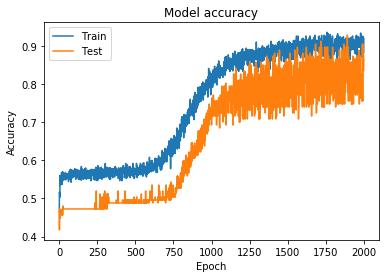

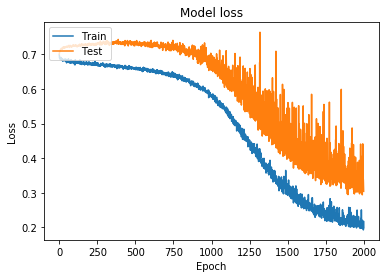

In [145]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [290]:
def fisherscore(data, labels, num):

    high = len(data)  # 向量个数
    weight = len(data[0])  # 向量长度
    P_num = np.sum(labels == 0)  # 正样本
    N_num = np.sum(labels == 1)  # 负样本

    # 计算Fisher score

    fisherscore = []
    for i in range(weight):
        p = []
        n = []
        p_var = []
        n_var = []
        for j in range(high):
            if labels[j] == 0:
                p.append(data[j, i])
            if labels[j] == 1:
                n.append(data[j, i])

        p_average = np.sum(p) / len(p)
        n_average = np.sum(n) / len(n)
        average = (np.sum(p) + np.sum(n)) / (len(p) + len(n))

        for j in range(high):
            if labels[j] == 0:
                p_var.append((data[j, i] - p_average) ** 2)
            if labels[j] == 1:
                n_var.append((data[j, i] - n_average) ** 2)

        score = ((p_average - average) ** 2 + (n_average - average) ** 2) / (
                    np.sum(p_var) / len(p) + np.sum(n_var) / len(n))

        fisherscore.append(score)

    index = np.argsort(-np.array(fisherscore))  # 返回索引
    new_data = []
    for i in range(num):
        new_data.append(data[:, index[i]])

    new_data = np.array(new_data)
    new_data = new_data.transpose(1, 0)

    return new_data

In [291]:
data = fisherscore(data, label, 2)

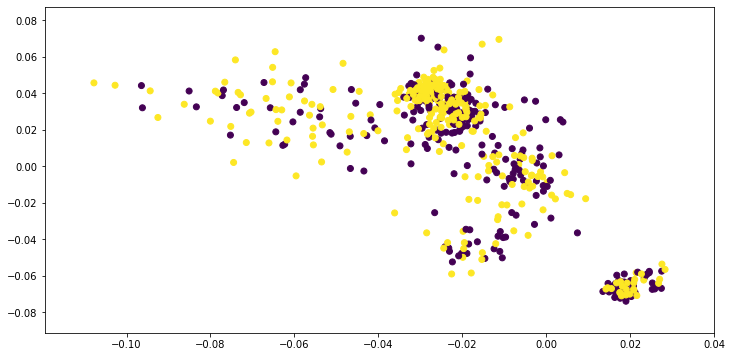

In [292]:
plt.figure(figsize=(12, 6))
plt.scatter(data[:, 0], data[:, 1], c=label)

In [247]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2)

In [248]:
from sklearn import svm
classifier = svm.LinearSVC()
classifier.fit(x_train, y_train)
classifier.score(x_test,y_test)

0.4881889763779528

In [59]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(512, activation='relu', input_dim=1500))
#model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

his = model.fit(x=x_train, y=y_train,batch_size=48, epochs=2000,shuffle=True, verbose=1, 
               validation_data=(x_test,y_test))


Train on 505 samples, validate on 127 samples
Epoch 1/500
505/505 [==============================] - 0s 936us/step - loss: 0.6931 - accuracy: 0.4990 - val_loss: 0.6921 - val_accuracy: 0.5276
Epoch 2/500
505/505 [==============================] - 0s 142us/step - loss: 0.6930 - accuracy: 0.5228 - val_loss: 0.6918 - val_accuracy: 0.5906
Epoch 3/500
505/505 [==============================] - 0s 126us/step - loss: 0.6928 - accuracy: 0.5307 - val_loss: 0.6916 - val_accuracy: 0.6142
Epoch 4/500
505/505 [==============================] - 0s 124us/step - loss: 0.6926 - accuracy: 0.5208 - val_loss: 0.6913 - val_accuracy: 0.5984
Epoch 5/500
505/505 [==============================] - 0s 117us/step - loss: 0.6925 - accuracy: 0.5267 - val_loss: 0.6912 - val_accuracy: 0.6063
Epoch 6/500
505/505 [==============================] - 0s 117us/step - loss: 0.6924 - accuracy: 0.5248 - val_loss: 0.6910 - val_accuracy: 0.6220
Epoch 7/500
505/505 [==============================] - 0s 115us/step - loss: 0.6922 

505/505 [==============================] - 0s 120us/step - loss: 0.6873 - accuracy: 0.5703 - val_loss: 0.6814 - val_accuracy: 0.5827
Epoch 113/500
505/505 [==============================] - 0s 124us/step - loss: 0.6873 - accuracy: 0.5822 - val_loss: 0.6814 - val_accuracy: 0.5748
Epoch 114/500
505/505 [==============================] - 0s 124us/step - loss: 0.6872 - accuracy: 0.5743 - val_loss: 0.6813 - val_accuracy: 0.5984
Epoch 115/500
505/505 [==============================] - 0s 126us/step - loss: 0.6872 - accuracy: 0.5842 - val_loss: 0.6813 - val_accuracy: 0.5906
Epoch 116/500
505/505 [==============================] - 0s 122us/step - loss: 0.6871 - accuracy: 0.5881 - val_loss: 0.6812 - val_accuracy: 0.5827
Epoch 117/500
505/505 [==============================] - 0s 117us/step - loss: 0.6872 - accuracy: 0.5980 - val_loss: 0.6812 - val_accuracy: 0.5748
Epoch 118/500
505/505 [==============================] - 0s 117us/step - loss: 0.6871 - accuracy: 0.5743 - val_loss: 0.6811 - val_ac

Epoch 168/500
505/505 [==============================] - 0s 124us/step - loss: 0.6858 - accuracy: 0.5842 - val_loss: 0.6790 - val_accuracy: 0.5984
Epoch 169/500
505/505 [==============================] - 0s 122us/step - loss: 0.6858 - accuracy: 0.5941 - val_loss: 0.6790 - val_accuracy: 0.5906
Epoch 170/500
505/505 [==============================] - 0s 126us/step - loss: 0.6858 - accuracy: 0.5861 - val_loss: 0.6790 - val_accuracy: 0.6142
Epoch 171/500
505/505 [==============================] - 0s 124us/step - loss: 0.6857 - accuracy: 0.6000 - val_loss: 0.6790 - val_accuracy: 0.5984
Epoch 172/500
505/505 [==============================] - 0s 120us/step - loss: 0.6857 - accuracy: 0.5960 - val_loss: 0.6789 - val_accuracy: 0.5984
Epoch 173/500
505/505 [==============================] - 0s 120us/step - loss: 0.6857 - accuracy: 0.5921 - val_loss: 0.6789 - val_accuracy: 0.5748
Epoch 174/500
505/505 [==============================] - 0s 118us/step - loss: 0.6857 - accuracy: 0.5861 - val_loss: 0

Epoch 224/500
505/505 [==============================] - 0s 124us/step - loss: 0.6846 - accuracy: 0.5782 - val_loss: 0.6776 - val_accuracy: 0.5906
Epoch 225/500
505/505 [==============================] - 0s 124us/step - loss: 0.6847 - accuracy: 0.5782 - val_loss: 0.6776 - val_accuracy: 0.5906
Epoch 226/500
505/505 [==============================] - 0s 120us/step - loss: 0.6845 - accuracy: 0.5782 - val_loss: 0.6775 - val_accuracy: 0.6220
Epoch 227/500
505/505 [==============================] - 0s 124us/step - loss: 0.6845 - accuracy: 0.5881 - val_loss: 0.6775 - val_accuracy: 0.6063
Epoch 228/500
505/505 [==============================] - 0s 117us/step - loss: 0.6845 - accuracy: 0.5901 - val_loss: 0.6775 - val_accuracy: 0.6063
Epoch 229/500
505/505 [==============================] - 0s 118us/step - loss: 0.6845 - accuracy: 0.5842 - val_loss: 0.6775 - val_accuracy: 0.6063
Epoch 230/500
505/505 [==============================] - 0s 132us/step - loss: 0.6845 - accuracy: 0.5782 - val_loss: 0

Epoch 280/500
505/505 [==============================] - 0s 124us/step - loss: 0.6836 - accuracy: 0.5822 - val_loss: 0.6767 - val_accuracy: 0.5906
Epoch 281/500
505/505 [==============================] - 0s 130us/step - loss: 0.6836 - accuracy: 0.5802 - val_loss: 0.6768 - val_accuracy: 0.5748
Epoch 282/500
505/505 [==============================] - 0s 124us/step - loss: 0.6835 - accuracy: 0.5901 - val_loss: 0.6768 - val_accuracy: 0.5906
Epoch 283/500
505/505 [==============================] - 0s 124us/step - loss: 0.6835 - accuracy: 0.5743 - val_loss: 0.6768 - val_accuracy: 0.5906
Epoch 284/500
505/505 [==============================] - 0s 124us/step - loss: 0.6835 - accuracy: 0.5802 - val_loss: 0.6768 - val_accuracy: 0.5906
Epoch 285/500
505/505 [==============================] - 0s 138us/step - loss: 0.6836 - accuracy: 0.5822 - val_loss: 0.6768 - val_accuracy: 0.5748
Epoch 286/500
505/505 [==============================] - 0s 124us/step - loss: 0.6835 - accuracy: 0.5683 - val_loss: 0

Epoch 336/500
505/505 [==============================] - 0s 120us/step - loss: 0.6826 - accuracy: 0.5881 - val_loss: 0.6763 - val_accuracy: 0.6142
Epoch 337/500
505/505 [==============================] - 0s 115us/step - loss: 0.6825 - accuracy: 0.5842 - val_loss: 0.6763 - val_accuracy: 0.6142
Epoch 338/500
505/505 [==============================] - 0s 115us/step - loss: 0.6825 - accuracy: 0.5762 - val_loss: 0.6763 - val_accuracy: 0.5906
Epoch 339/500
505/505 [==============================] - 0s 115us/step - loss: 0.6825 - accuracy: 0.5822 - val_loss: 0.6763 - val_accuracy: 0.5984
Epoch 340/500
505/505 [==============================] - 0s 118us/step - loss: 0.6825 - accuracy: 0.5782 - val_loss: 0.6763 - val_accuracy: 0.5984
Epoch 341/500
505/505 [==============================] - 0s 118us/step - loss: 0.6825 - accuracy: 0.5861 - val_loss: 0.6763 - val_accuracy: 0.6142
Epoch 342/500
505/505 [==============================] - 0s 117us/step - loss: 0.6824 - accuracy: 0.5842 - val_loss: 0

Epoch 392/500
505/505 [==============================] - 0s 118us/step - loss: 0.6816 - accuracy: 0.5743 - val_loss: 0.6758 - val_accuracy: 0.5748
Epoch 393/500
505/505 [==============================] - 0s 118us/step - loss: 0.6815 - accuracy: 0.5861 - val_loss: 0.6758 - val_accuracy: 0.5748
Epoch 394/500
505/505 [==============================] - 0s 118us/step - loss: 0.6815 - accuracy: 0.5802 - val_loss: 0.6758 - val_accuracy: 0.5669
Epoch 395/500
505/505 [==============================] - 0s 118us/step - loss: 0.6815 - accuracy: 0.5782 - val_loss: 0.6758 - val_accuracy: 0.5669
Epoch 396/500
505/505 [==============================] - 0s 118us/step - loss: 0.6815 - accuracy: 0.5762 - val_loss: 0.6758 - val_accuracy: 0.5669
Epoch 397/500
505/505 [==============================] - 0s 118us/step - loss: 0.6814 - accuracy: 0.5822 - val_loss: 0.6758 - val_accuracy: 0.5669
Epoch 398/500
505/505 [==============================] - 0s 120us/step - loss: 0.6814 - accuracy: 0.5782 - val_loss: 0

Epoch 448/500
505/505 [==============================] - 0s 124us/step - loss: 0.6806 - accuracy: 0.5723 - val_loss: 0.6759 - val_accuracy: 0.5906
Epoch 449/500
505/505 [==============================] - 0s 118us/step - loss: 0.6805 - accuracy: 0.5782 - val_loss: 0.6759 - val_accuracy: 0.5748
Epoch 450/500
505/505 [==============================] - 0s 115us/step - loss: 0.6806 - accuracy: 0.5802 - val_loss: 0.6759 - val_accuracy: 0.5669
Epoch 451/500
505/505 [==============================] - 0s 115us/step - loss: 0.6805 - accuracy: 0.5822 - val_loss: 0.6759 - val_accuracy: 0.5669
Epoch 452/500
505/505 [==============================] - 0s 117us/step - loss: 0.6804 - accuracy: 0.5743 - val_loss: 0.6759 - val_accuracy: 0.5669
Epoch 453/500
505/505 [==============================] - 0s 118us/step - loss: 0.6805 - accuracy: 0.5842 - val_loss: 0.6759 - val_accuracy: 0.5669
Epoch 454/500
505/505 [==============================] - 0s 118us/step - loss: 0.6804 - accuracy: 0.5762 - val_loss: 0

In [157]:
from sklearn import svm
classifier = svm.SVC(gamma='auto')
classifier.fit(train_data, train_label)
classifier.score(test_data,test_label)

0.5555555555555556

In [158]:
#使用pca降维
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_train = pca.fit_transform(train_data)
pca_test = pca.fit_transform(test_data)
print("new_train.shape:", pca_train.shape)
print("new_test.shape:", pca_test.shape)

from sklearn import svm
classifier = svm.LinearSVC()
classifier.fit(pca_train, train_label)
classifier.score(pca_test,test_label)

new_train.shape: (515, 2)
new_test.shape: (117, 2)


D:\anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5299145299145299

In [144]:
def fisherscore(data, labels, num):

    high = len(data)  # 向量个数
    weight = len(data[0])  # 向量长度
    P_num = np.sum(labels == 0)  # 正样本
    N_num = np.sum(labels == 1)  # 负样本

    # 计算Fisher score

    fisherscore = []
    for i in range(weight):
        p = []
        n = []
        p_var = []
        n_var = []
        for j in range(high):
            if labels[j] == 0:
                p.append(data[j, i])
            if labels[j] == 1:
                n.append(data[j, i])

        p_average = np.sum(p) / len(p)
        n_average = np.sum(n) / len(n)
        average = (np.sum(p) + np.sum(n)) / (len(p) + len(n))

        for j in range(high):
            if labels[j] == 0:
                p_var.append((data[j, i] - p_average) ** 2)
            if labels[j] == 1:
                n_var.append((data[j, i] - n_average) ** 2)

        score = ((p_average - average) ** 2 + (n_average - average) ** 2) / (
                    np.sum(p_var) / len(p) + np.sum(n_var) / len(n))

        fisherscore.append(score)

    index = np.argsort(-np.array(fisherscore))  # 返回索引
    new_data = []
    for i in range(num):
        new_data.append(data[:, index[i]])

    new_data = np.array(new_data)
    new_data = new_data.transpose(1, 0)

    return new_data

In [145]:
fisher_train = fisherscore(train_data, train_label, 22)
fisher_test = fisherscore(test_data,test_label, 22)

In [146]:
from sklearn import svm
classifier = svm.LinearSVC()
classifier.fit(fisher_train, train_label)
classifier.score(fisher_test,test_label)

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5384615384615384